In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno


import warnings
warnings.filterwarnings('ignore')

# 1. Dataset 확인

In [4]:
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [9]:
for col in df_train.columns:
    msg = f'column :{col:>10}\t Percent of Nan value:{100*df_train[col].isnull().sum()/df_train[col].shape[0]:.2f}%'
    print(msg)

column :PassengerId	 Percent of Nan value:0.00%
column :  Survived	 Percent of Nan value:0.00%
column :    Pclass	 Percent of Nan value:0.00%
column :      Name	 Percent of Nan value:0.00%
column :       Sex	 Percent of Nan value:0.00%
column :       Age	 Percent of Nan value:19.87%
column :     SibSp	 Percent of Nan value:0.00%
column :     Parch	 Percent of Nan value:0.00%
column :    Ticket	 Percent of Nan value:0.00%
column :      Fare	 Percent of Nan value:0.00%
column :     Cabin	 Percent of Nan value:77.10%
column :  Embarked	 Percent of Nan value:0.22%


In [10]:
for col in df_test.columns:
    msg = f'column :{col:>10}\t Percent of Nan value:{100*df_test[col].isnull().sum()/df_test[col].shape[0]:.2f}%'
    print(msg)

column :PassengerId	 Percent of Nan value:0.00%
column :    Pclass	 Percent of Nan value:0.00%
column :      Name	 Percent of Nan value:0.00%
column :       Sex	 Percent of Nan value:0.00%
column :       Age	 Percent of Nan value:20.57%
column :     SibSp	 Percent of Nan value:0.00%
column :     Parch	 Percent of Nan value:0.00%
column :    Ticket	 Percent of Nan value:0.00%
column :      Fare	 Percent of Nan value:0.24%
column :     Cabin	 Percent of Nan value:78.23%
column :  Embarked	 Percent of Nan value:0.00%


<AxesSubplot:>

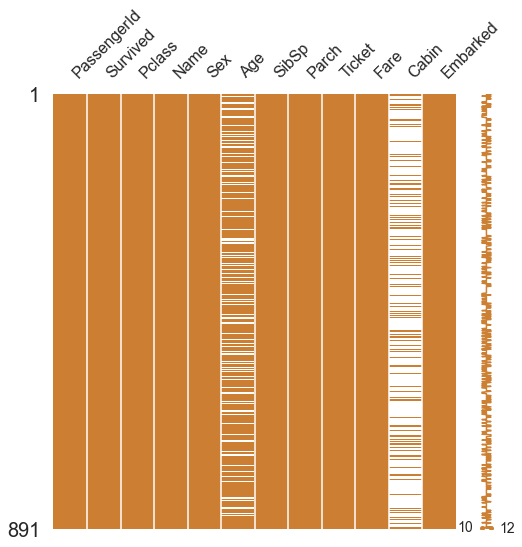

In [11]:
# MANO 라는 라이브러리를 이용해 null값 확인
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

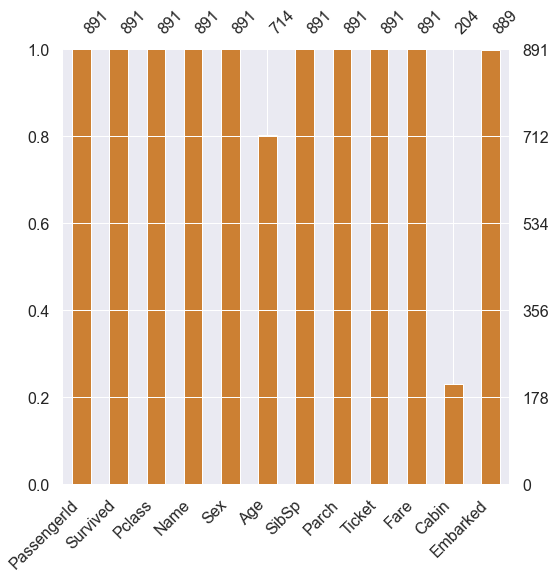

In [12]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

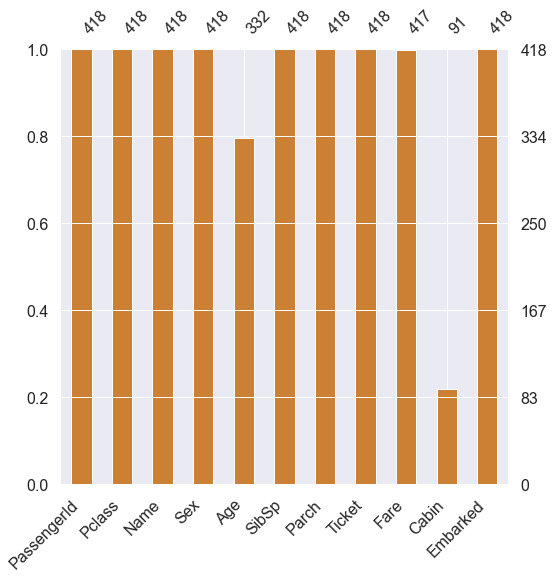

In [13]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2 Target label 확인
- binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음

- 살아남은 사람 38.4%

Text(0.5, 1.0, 'Count plot - Survived')

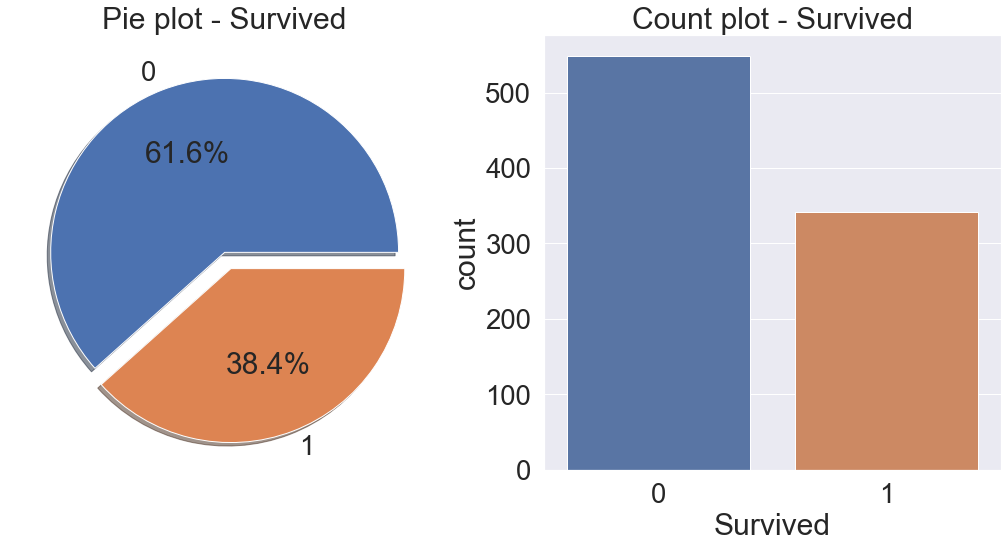

In [21]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

# explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정
explode = [0, 0.1]
df_train['Survived'].value_counts().plot.pie(explode=explode, autopct='%.1f%%', ax=ax[0], shadow=True )
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

## EDA

### 2.1 Pclass

- Pclass 는 ordinal, 서수형 데이터. 카테고리이면서, 순서가 있는 데이터 타입

In [32]:
# Pclass 에 따른 생존률의 차이

# count를 하면 각 class에 몇명이 있었는지 보여줌
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [33]:
# sum을 하면 각 class에 suvived가 1인(살아남은 사람)이 몇명 인지있었는지 보여줌
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [34]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

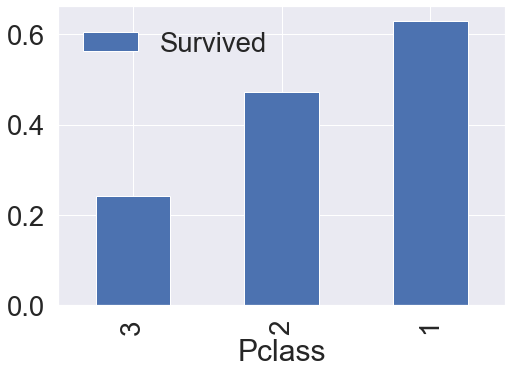

In [42]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar()

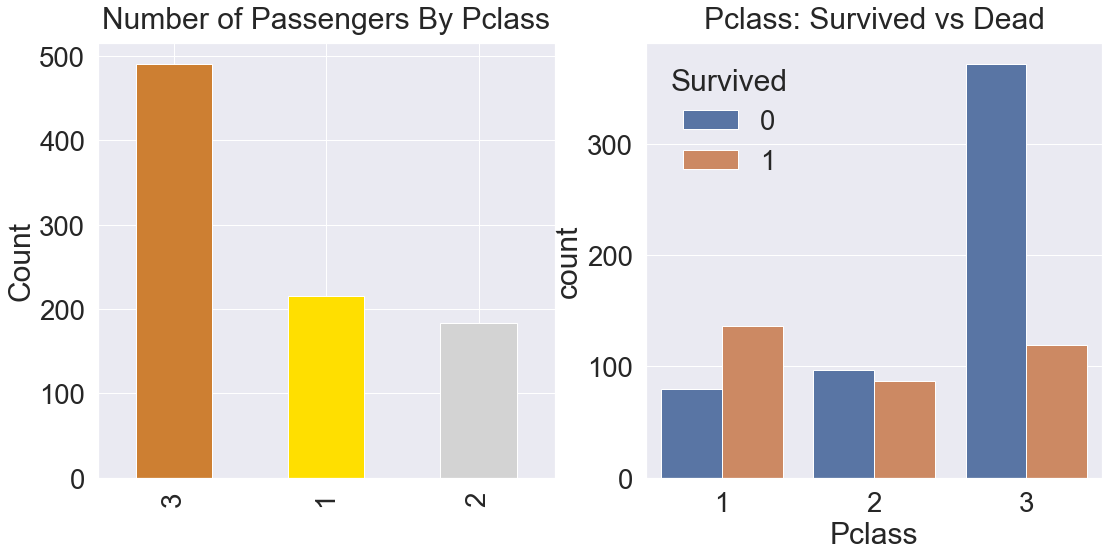

In [43]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

### 2.2 Sex

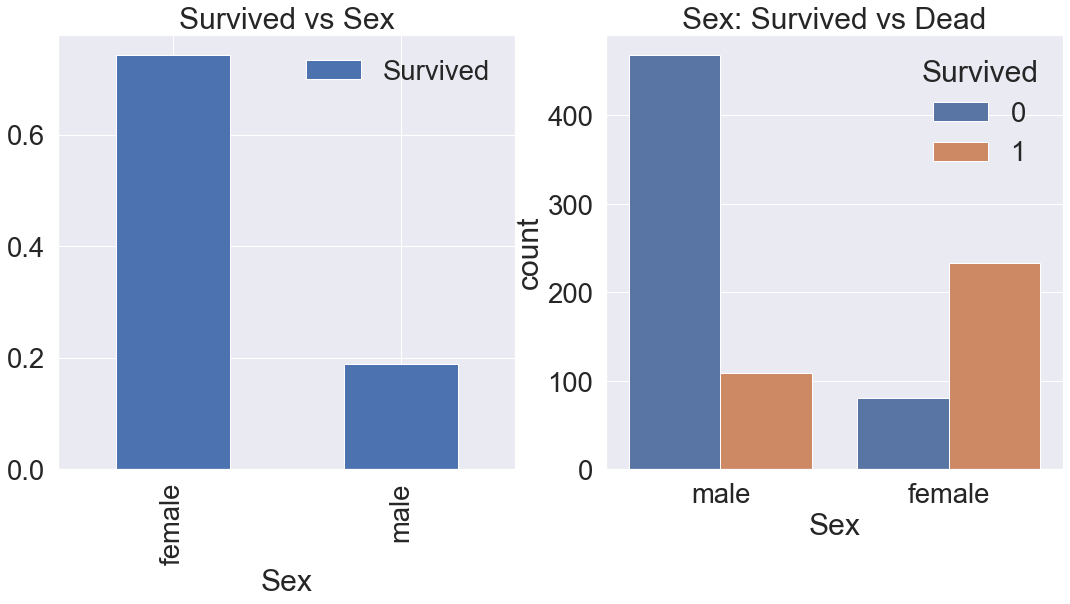

In [44]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()